In [2]:
import pandas as pd

df= pd.read_csv(r"preprocessed.csv")


In [3]:
df['timestamp'] = pd.to_datetime(df['timestamp'])


In [4]:
# Define the start and end time
start_time1 = '2022-02-20 00:00:00'
end_time1 = '2022-02-28 21:53:00'

start_time2 = '2022-03-01 03:00:00'
end_time2 = '2022-03-23 14:54:00'

start_time3 = '2022-05-01 03:00:00'
end_time3 = '2022-05-30 12:00:00'


# Convert start and end time to datetime
start_time1 = pd.to_datetime(start_time1)
end_time1 = pd.to_datetime(end_time1)

start_time2 = pd.to_datetime(start_time2)
end_time2 = pd.to_datetime(end_time2)

start_time3 = pd.to_datetime(start_time3)
end_time3 = pd.to_datetime(end_time3)

# Filter the DataFrame
filtered_df1 = df[(df['timestamp'] >= start_time1) & (df['timestamp'] <= end_time1)]
filtered_df2 = df[(df['timestamp'] >= start_time2) & (df['timestamp'] <= end_time2)]
filtered_df3 = df[(df['timestamp'] >= start_time3) & (df['timestamp'] <= end_time3)]


In [5]:
merged_chunks = [filtered_df1, filtered_df2, filtered_df3]  # List of DataFrames
merged_chunks = [filtered_df1]  # List of DataFrames

import numpy as np
import pandas as pd

RUL_CAP = 3  # RUL cap in days

# Iterate through each DataFrame in chunks
for i, df in enumerate(merged_chunks):
    print(f"Processing chunk {i+1} with {len(df)} rows.")
    
    # Ensure 'timestamp' is in datetime format
    df['timestamp'] = pd.to_datetime(df['timestamp'])

    # Calculate the maximum time for the current chunk
    max_time = df['timestamp'].max()

    # Compute RUL in days
    df['rul'] = (max_time - df['timestamp']).dt.total_seconds() / (24 * 3600)  # Convert to days

    # Cap the RUL at RUL_CAP days
    df['rul'] = df['rul'].clip(upper=RUL_CAP)  # Cap at RUL_CAP days

    # Convert 'rul' in days to Timedelta for consistency
    # df['rul'] = pd.to_timedelta(df['rul'], unit='D')  

    # Compute reversed time for plotting
    df['reversed_time'] = max_time - df['timestamp']  # This is already a Timedelta

    # Optional: Preview the processed DataFrame
    # print(df[['timestamp', 'rul', 'reversed_time']].head())


Processing chunk 1 with 640390 rows.


In [6]:
# Merge all DataFrames in merged_chunks into a single DataFrame
final_df = pd.concat(merged_chunks, ignore_index=True)

# Check the result
print(f"Final DataFrame has {len(final_df)} rows.")


Final DataFrame has 640390 rows.


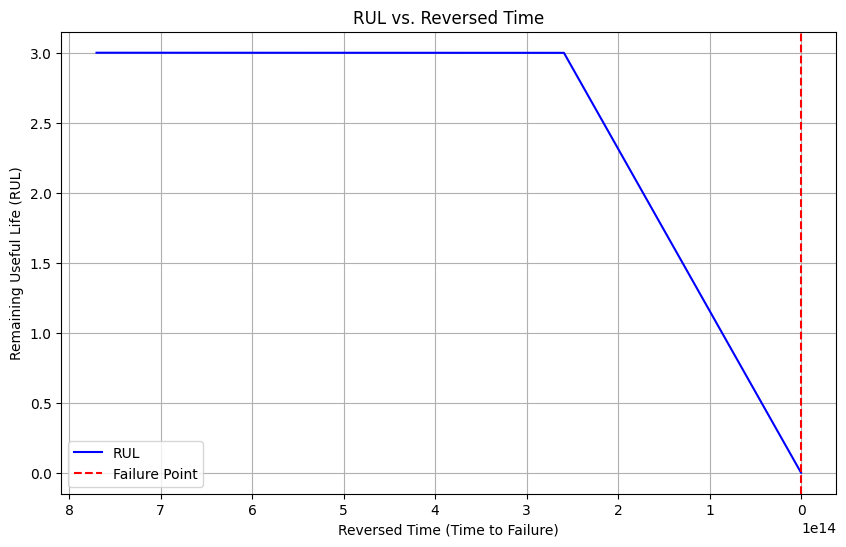

In [7]:
import matplotlib.pyplot as plt

df = final_df

# Plot RUL vs. reversed time
plt.figure(figsize=(10, 6))
plt.plot(df['reversed_time'], df['rul'], label='RUL', color='blue')

# Invert the X-axis to represent time to failure
plt.gca().invert_xaxis()
plt.axvline(x=0, color='red', linestyle='--', label='Failure Point')

# Add labels, legend, and grid
plt.xlabel('Reversed Time (Time to Failure)')
plt.ylabel('Remaining Useful Life (RUL)')
plt.title('RUL vs. Reversed Time')
plt.legend()
plt.grid(True)
plt.show()


In [8]:
# merged_chunks[2]

In [9]:
final_df

,Unnamed: 0,index,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Flowmeter,Motor_current,...,Caudal_impulses,gpsLong,gpsLat,gpsSpeed,gpsQuality,cluster,timestamp,cluster_changed,rul,reversed_time
0,3591795,3591795,-0.008,8.228,8.232,-0.030,1.630,70.800,18.844062,3.7500,...,0,0.00000,0.0000,0,0,1,2022-02-20 00:00:00,0,3.000000,8 days 21:53:00
1,3591796,3591796,-0.008,8.226,8.228,-0.028,1.630,70.775,18.853406,3.7900,...,0,0.00000,0.0000,0,0,1,2022-02-20 00:00:01,0,3.000000,8 days 21:52:59
2,3591797,3591797,-0.006,8.228,8.230,-0.030,1.630,70.775,18.853406,3.8750,...,0,0.00000,0.0000,0,0,1,2022-02-20 00:00:02,0,3.000000,8 days 21:52:58
3,3591798,3591798,-0.006,8.226,8.228,-0.028,1.630,70.775,18.853406,3.8150,...,0,0.00000,0.0000,0,0,1,2022-02-20 00:00:03,0,3.000000,8 days 21:52:57
4,3591799,3591799,-0.006,8.224,8.226,-0.028,1.630,70.800,18.862750,3.7650,...,0,0.00000,0.0000,0,0,1,2022-02-20 00:00:04,0,3.000000,8 days 21:52:56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
640385,4232180,4232180,9.224,8.754,-0.006,-0.020,1.728,66.400,31.093719,5.6800,...,0,-8.65935,41.2136,0,1,0,2022-02-28 21:52:56,0,0.000046,0 days 00:00:04
640386,4232181,4232181,9.250,8.778,-0.008,-0.022,1.728,66.425,31.196500,5.8075,...,0,-8.65935,41.2136,0,1,0,2022-02-28 21:52:57,0,0.000035,0 days 00:00:03
640387,4232182,4232182,9.274,8.798,-0.008,-0.020,1.726,66.600,31.131094,5.8075,...,0,-8.65935,41.2136,0,1,0,2022-02-28 21:52:58,0,0.000023,0 days 00:00:02
640388,4232183,4232183,9.290,8.824,-0.006,-0.022,1.728,66.725,31.177813,5.6900,...,0,-8.65935,41.2136,0,1,0,2022-02-28 21:52:59,0,0.000012,0 days 00:00:01


In [10]:
df.drop(["Unnamed: 0","index","timestamp","cluster_changed","reversed_time"], axis=1, inplace=True)


In [11]:
df.columns


Index(['TP2', 'TP3', 'H1', 'DV_pressure', 'Reservoirs', 'Oil_temperature',
       'Flowmeter', 'Motor_current', 'COMP', 'DV_eletric', 'Towers', 'MPG',
       'LPS', 'Pressure_switch', 'Oil_level', 'Caudal_impulses', 'gpsLong',
       'gpsLat', 'gpsSpeed', 'gpsQuality', 'cluster', 'rul'],
      dtype='object')

# Train Test Split

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from keras.models import Sequential
from keras.layers import Dense, LSTM, Conv1D, Flatten
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from keras.layers import TimeDistributed, MaxPooling1D, Dropout

In [13]:
# Splitting features (X) and target (y)
X = df.drop(columns=['rul'])
y = df['rul']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Applying PCA to reduce dimensions
pca = PCA(n_components=2)  # Keep 10 principal components (adjust as needed)
X_pca = pca.fit_transform(X_scaled)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)


In [14]:
from tensorflow.keras.layers import Bidirectional, Attention, Concatenate, Input
from tensorflow.keras.models import Model

# Convert DataFrame to NumPy array
X_train_np = X_train.values

# Reshape to add a time step dimension (samples, time_steps, features)
X_train_reshaped = X_train_np.reshape(X_train_np.shape[0], X_train_np.shape[1], 1)

# Build CNN-Bidirectional LSTM Model with Attention for Regression
input_layer = Input(shape=(X_train_np.shape[1], 1))

# CNN layer
conv_layer = Conv1D(filters=64, kernel_size=2, activation='relu')(input_layer)
pool_layer = MaxPooling1D(pool_size=2)(conv_layer)

# Bidirectional LSTM layer
bi_lstm_layer = Bidirectional(LSTM(50, activation='relu', return_sequences=True))(pool_layer)

# Attention layer
attention_layer = Attention(use_scale=True)([bi_lstm_layer, bi_lstm_layer])
attention_output = Concatenate(axis=-1)([bi_lstm_layer, attention_layer])

# Final LSTM and Dense layer
lstm_layer = LSTM(50, activation='relu')(attention_output)
dense_layer = Dense(1, activation='linear')(lstm_layer)  # Linear activation for regression

# Define and compile model
cnn_lstm_model = Model(inputs=input_layer, outputs=dense_layer)
cnn_lstm_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Fit the model
cnn_lstm_model.fit(X_train_reshaped, y_train, epochs=1, batch_size=32)

# Convert X_test to NumPy array and reshape to match the input shape
X_test_np = X_test.values
X_test_reshaped = X_test_np.reshape(X_test_np.shape[0], X_test_np.shape[1], 1)

# Make predictions with the trained model
cnn_lstm_preds = cnn_lstm_model.predict(X_test_reshaped)


8005/8005 [==============================] - 46s 6ms/step


In [15]:
# Evaluation Metrics
def calculate_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    return mse, mae, rmse

In [16]:
# Compare Models
results = {
    'Model': ['Logistic Regression', 'Perceptron', 'LSTM', 'CNN-LSTM'],
    'MSE': [
        calculate_metrics(y_test, cnn_lstm_preds)[0]
    ],
    'MAE': [
        calculate_metrics(y_test, cnn_lstm_preds)[1]
    ],
    'RMSE': [
        calculate_metrics(y_test, cnn_lstm_preds)[2]
    ]
}

results_df = pd.DataFrame(results)

ValueError: All arrays must be of the same length

In [110]:
results_df

,Model,MSE,MAE,RMSE
0,Logistic Regression,2.971337,1.600514,1.723757
1,Perceptron,0.812383,0.799145,0.901323
2,LSTM,0.768030,0.734162,0.876373
3,CNN-LSTM,0.774457,0.679108,0.880032
